# Análise de Óbitos 2020
Este notebook apresenta uma análise detalhada dos dados de óbitos em 2020 no Brasil, explorando diversas estatísticas descritivas, gráficos, testes de hipóteses e regressão linear para entender melhor as tendências e padrões nos dados.

## Carregamento dos Dados
Os dados são carregados de um arquivo CSV contendo informações sobre óbitos em 2020 por diferentes doenças, faixas etárias e locais.

In [1]:

# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


In [2]:

# Carregar os dados
path = '../01 - dataframe\obitos-2020.csv'
df = pd.read_csv(path)
df.head()


,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,10
2,AC,OUTRAS,HOSPITAL,< 9,F,69
3,AC,OUTRAS,HOSPITAL,< 9,I,1
4,AC,OUTRAS,HOSPITAL,< 9,M,68


## Estatísticas Descritivas

In [15]:
df.describe()



,total
count,15535.000000
mean,91.414290
std,413.712641
min,1.000000
25%,2.000000
50%,6.000000
75%,33.000000
max,12436.000000


In [16]:
# Vamos verificar os tipos de dados das colunas
types = df.dtypes

# Para encontrar colunas que são do tipo string, podemos verificar o tipo 'object' (que geralmente indica strings em pandas)
string_columns = types[types == 'object'].index.tolist()

print("Colunas do tipo string:")
print(string_columns)

Colunas do tipo string:
['uf', 'tipo_doenca', 'local_obito', 'faixa_etaria', 'sexo']


## Gráficos

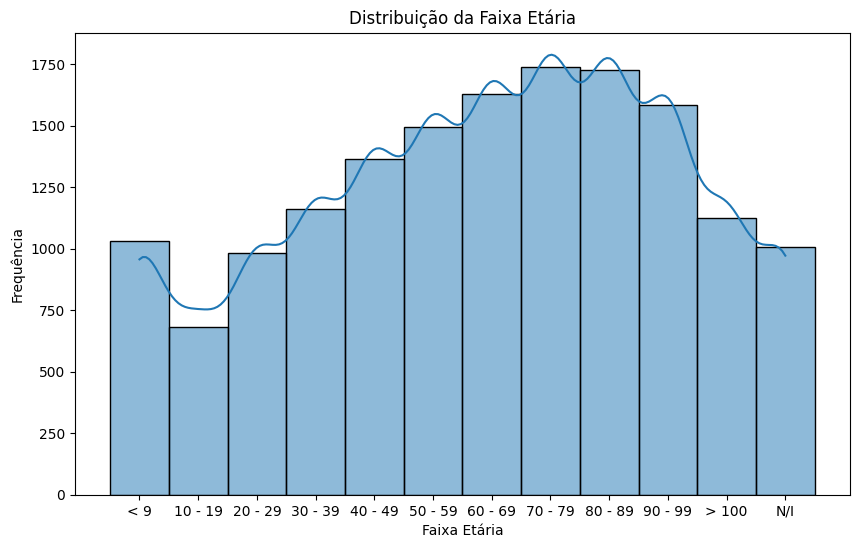

In [4]:

# Distribuição de Faixa Etária
plt.figure(figsize=(10, 6))
sns.histplot(df['faixa_etaria'], kde=True)
plt.title('Distribuição da Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Frequência')
plt.show()


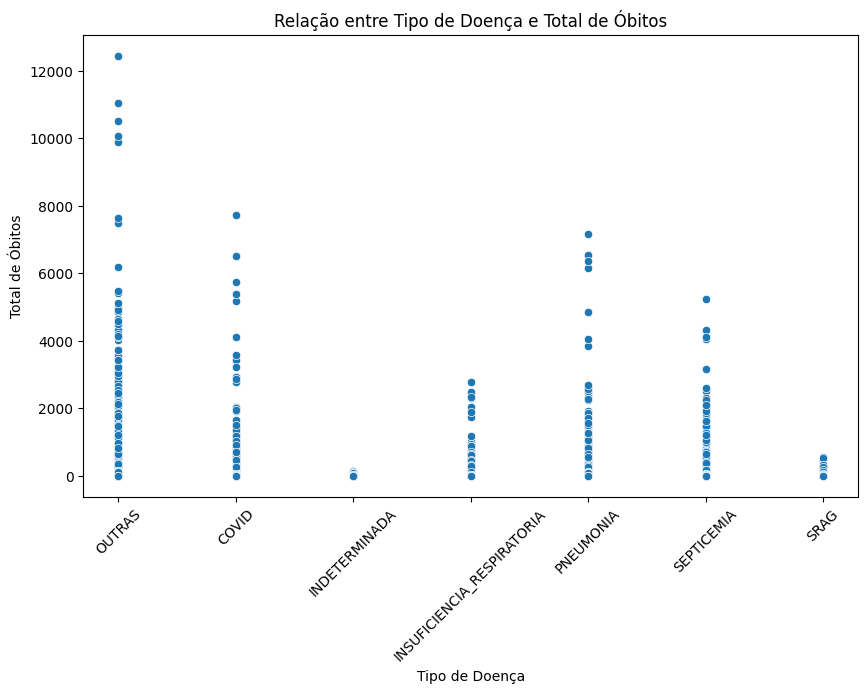

In [5]:

# Relação entre Tipo de Doença e Total de Óbitos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tipo_doenca', y='total')
plt.title('Relação entre Tipo de Doença e Total de Óbitos')
plt.xlabel('Tipo de Doença')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.show()


## Testes de Hipóteses

In [6]:

# Teste T para duas amostras independentes
group1 = df[df['uf'] == 'SP']['total']
group2 = df[df['uf'] == 'RJ']['total']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"Estatística T: {t_stat}, Valor-p: {p_value}")



Estatística T: 2.730045633835205, Valor-p: 0.006397746863702645


## Regressão Linear

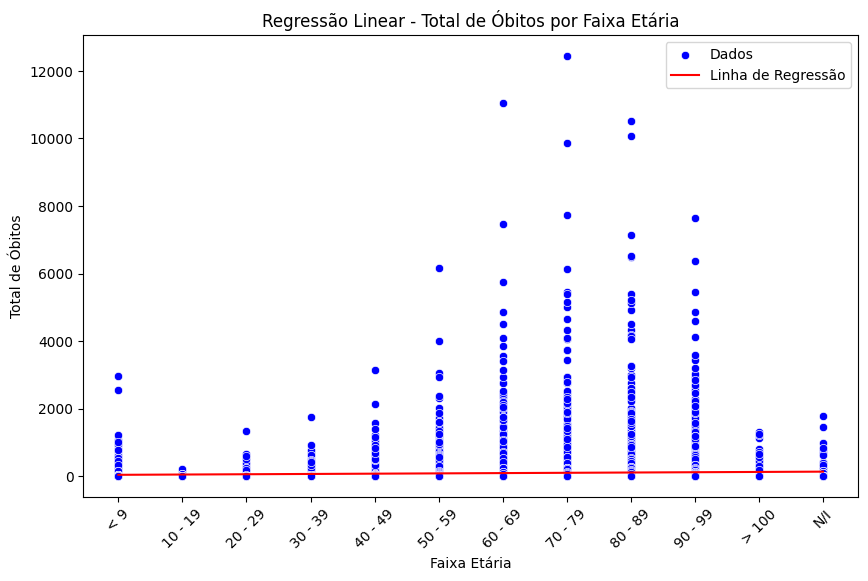

In [7]:
# Preparar dados para regressão linear
faixa_etaria_encoded, unique_faixas = df['faixa_etaria'].factorize()
X = faixa_etaria_encoded.reshape(-1, 1)  # Converting categorical df to numeric
y = df['total']

# Criar e treinar o modelo de regressão
model = LinearRegression()
model.fit(X, y)

# Preparar dados para a linha de regressão
unique_X = np.unique(X)  # Unique encoded faixa_etaria values
predicted_y = model.predict(unique_X.reshape(-1, 1))  # Predict only for unique values

# Visualização da Regressão Linear
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='faixa_etaria', y='total', color='blue', label='Dados')
plt.plot(unique_faixas[unique_X], predicted_y, color='red', label='Linha de Regressão')  # Use decoded faixa_etaria values for x-axis
plt.title('Regressão Linear - Total de Óbitos por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Óbitos')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [8]:

# Agrupar por estado e somar as mortes de cada um
state_totals = df.groupby('uf')['total'].sum()

# Fazer uma comparação da morte entre os estados
states = df['uf'].unique()
state_df = [df[df['uf'] == state]['total'] for state in states]
anova_result = stats.f_oneway(*state_df)

print(anova_result)


F_onewayResult(statistic=27.88435883892757, pvalue=8.931615880200462e-133)


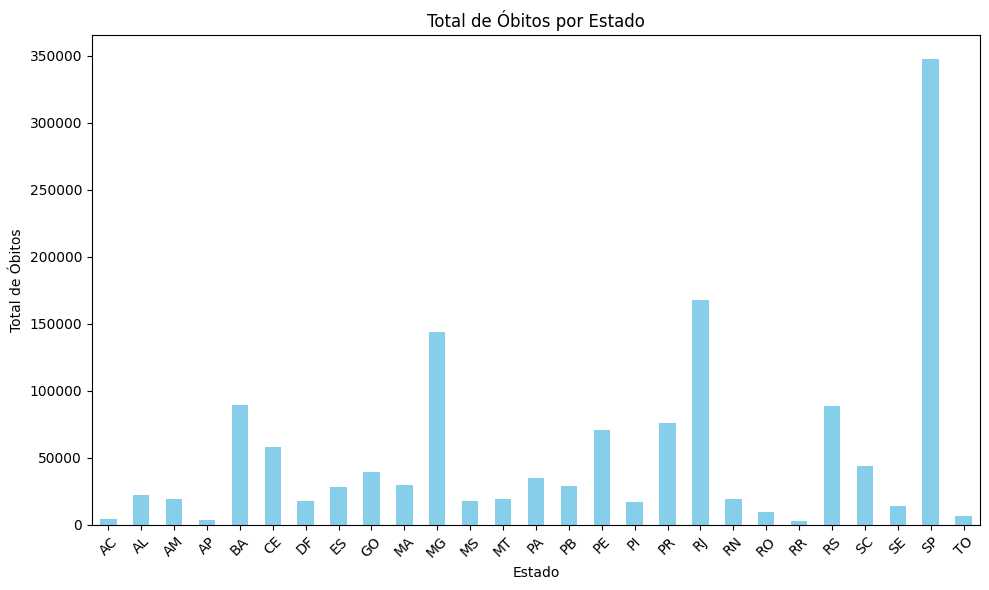

In [9]:
state_totals = df.groupby('uf')['total'].sum()

# Plot
plt.figure(figsize=(10, 6))
state_totals.plot(kind='bar', color='skyblue')
plt.title('Total de Óbitos por Estado')
plt.xlabel('Estado')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:

# Group by place of death and calculate the total deaths
place_totals = df.groupby('local_obito')['total'].sum()

# Perform chi-square test to compare places of death
contingency_table = pd.crosstab(df['local_obito'], df['total'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
chi2, p


(6013.9368053202315, 1.0)

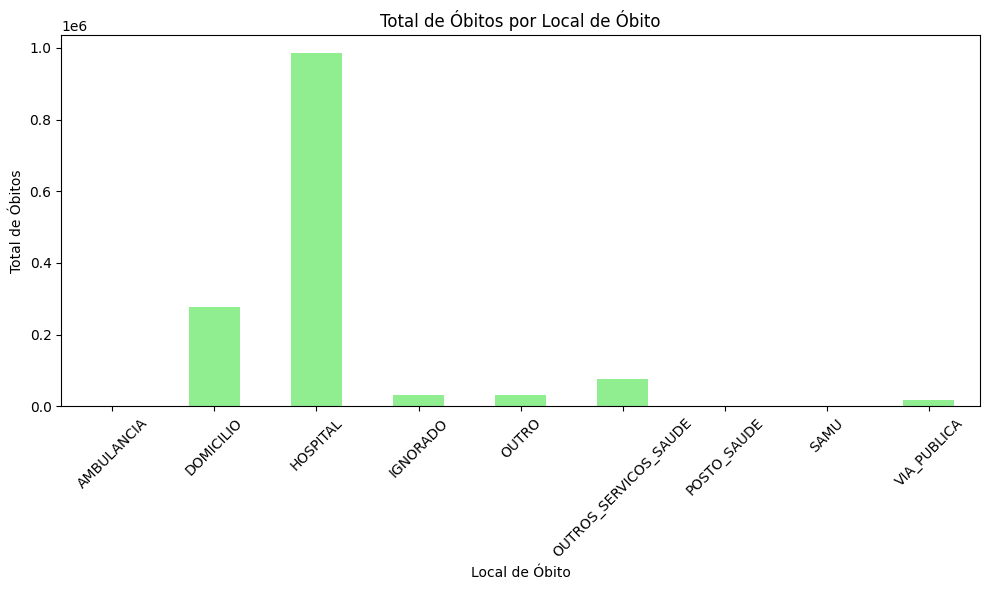

In [11]:
# Total de óbitos por local de óbito
place_totals = df.groupby('local_obito')['total'].sum()

# Plot
plt.figure(figsize=(10, 6))
place_totals.plot(kind='bar', color='lightgreen')
plt.title('Total de Óbitos por Local de Óbito')
plt.xlabel('Local de Óbito')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:

# Group by age group and gender, then calculate the total deaths
age_gender_totals = df.groupby(['faixa_etaria', 'sexo'])['total'].sum().unstack()

# Perform two-way ANOVA to compare age groups and genders
age_groups = df['faixa_etaria'].unique()
genders = df['sexo'].unique()
age_gender_data = {age: [df[(df['faixa_etaria'] == age) & (df['sexo'] == gender)]['total'].sum() for gender in genders] for age in age_groups}
anova_result_age_gender = stats.f_oneway(*[age_gender_data[age] for age in age_groups])
anova_result_age_gender


F_onewayResult(statistic=1.4663887898752264, pvalue=0.18720700632765647)

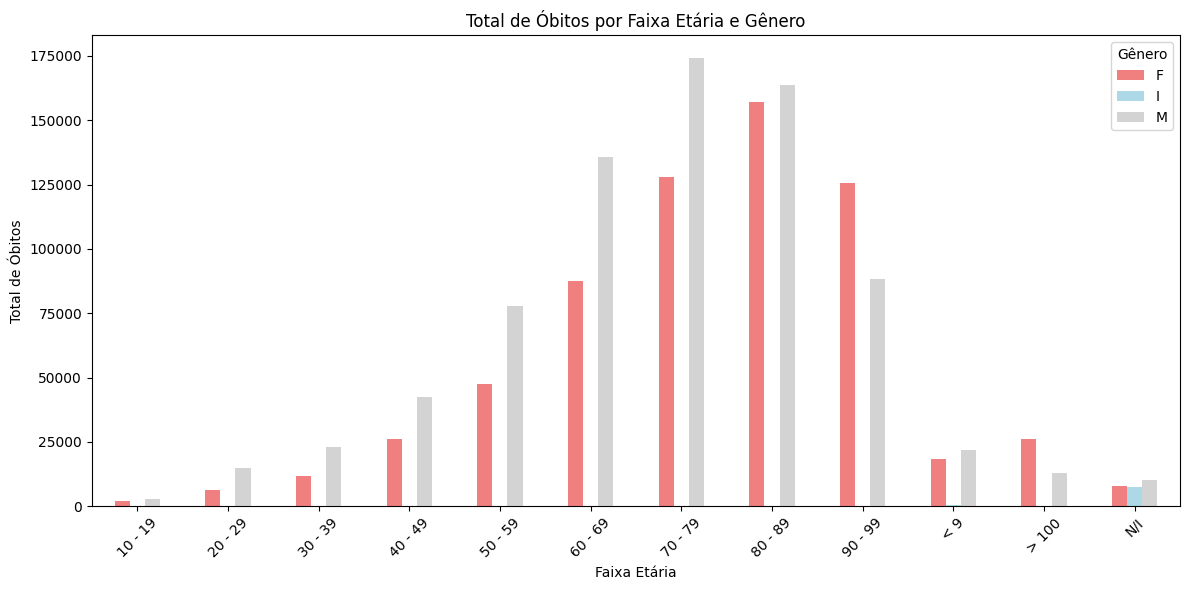

In [13]:
# Total de óbitos por faixa etária e gênero
age_gender_totals = df.groupby(['faixa_etaria', 'sexo'])['total'].sum().unstack()

# Plot
age_gender_totals.plot(kind='bar', figsize=(12, 6), color=['lightcoral', 'lightblue', 'lightgray'])
plt.title('Total de Óbitos por Faixa Etária e Gênero')
plt.xlabel('Faixa Etária')
plt.ylabel('Total de Óbitos')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()
